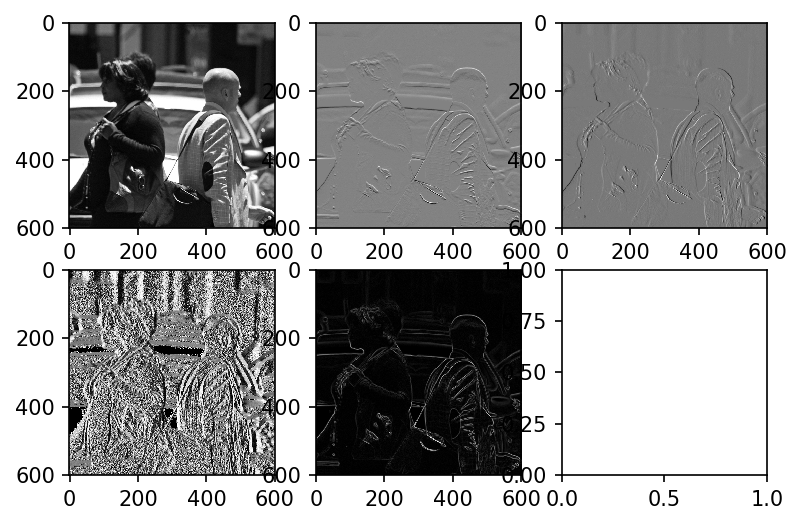

In [151]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
plt.rcParams['image.cmap'] = 'gray'

image_rgb=skimage.io.imread("hog.png")
image_rgb=image_rgb[:600,:600,:]
image=np.mean(image_rgb,axis=2)

gx,gy=np.gradient(image)
#angle=np.zeros_like(gx)
angle=np.abs(np.arctan2(gx,gy))
mag = np.sqrt(gx**2+gy**2)

f,((a1,a2,a3),(b1,b2,b3))=plt.subplots(2,3,dpi=150)
a1.imshow(image)
a2.imshow(gx)
a3.imshow(gy)
b1.imshow(angle)
b2.imshow(mag)
plt.show()


[ 2.53930531  2.49809154  1.24904577  0.14189705  2.97644398  2.57486344
  1.98902066  1.81577499  2.03444394  2.07363954  2.65711472  3.14159265
  1.42889927  3.14159265  2.8753406   1.19028995  1.64756822  2.52134317
  2.30623609  2.67794504  2.15879893  2.35619449  0.69473828  2.15879893
  1.90553316  1.70049886  2.3162158   2.65907936  2.35619449  2.35619449
  2.73670087  2.06075365  1.14660192  2.05330962  2.772259    2.52440126
  2.61351821  2.21429744  2.9996956   1.929567    1.13416917  2.23676556
  2.31455191  2.41734265  2.2655346   2.25972072  2.20354516  1.91008894
  0.89605538  1.59643174  2.20442933  2.411693    2.35619449  2.89661399
  2.52134317  3.14159265  1.3948567   1.20146267  2.20582306  2.45205364
  2.63286283  2.51279637  2.78282198  2.64765128]
[ 0.          0.39269908  0.78539816  1.17809725  1.57079633  1.96349541
  2.35619449  2.74889357  3.14159265]
8
[7 7 4 1 8 7 6 5 6 6 7 8 4 8 8 4 5 7 6 7 6 6 2 6 5 5 6 7 6 6 7 6 3 6 8 7 7
 6 8 5 3 6 6 7 6 6 6 5 3 5 6 7 6

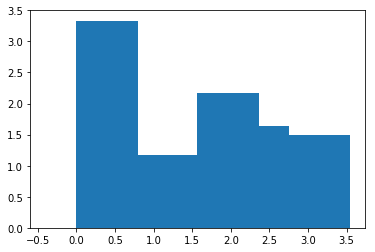

In [127]:
ws=8
px,py=154,104

n=ws*ws
rangle=np.reshape(angle[px:px+ws,py:py+ws],n)
rmag=np.reshape(mag[px:px+ws,py:py+ws],n)
print(rangle)

histogram_size=8
eps=1e-10
bins=np.linspace(0,np.pi+eps,histogram_size+1)
print(bins)

indices=np.digitize(rangle,bins)
print(np.max(indices))
print(indices)

histogram=np.zeros(len(bins))
histogram[indices]+=rmag[indices]
print(histogram)
plt.bar(bins,histogram)
plt.show()


In [152]:
rows,cols=angle.shape

ws=6

histogram_size=8
eps=1e-10
bins=np.linspace(0,np.pi+eps,histogram_size+1)

cells_r,cells_c= ( rows//ws,cols//ws)

#from numpy.lib.stride_tricks import as_strided

from skimage.util import view_as_blocks,view_as_windows


block_angle=view_as_blocks(angle, block_shape=(ws,ws))
new_shape=(block_angle.shape[0],block_angle.shape[1],ws*ws)
block_angle=block_angle.reshape(new_shape)

block_mag=view_as_blocks(mag, block_shape=(ws,ws))
block_mag=block_mag.reshape(new_shape)

histograms=np.zeros( (block_angle.shape[0],block_angle.shape[1],len(bins)) )


for i in range(block_angle.shape[0]):
    for j in range(block_angle.shape[1]):
        rangle,rmag=(block_angle[i,j],block_mag[i,j])
        indices=np.digitize(rangle,bins)
        histograms[i,j,indices]+=rmag[indices]

overlap=1

from numpy.lib.stride_tricks import as_strided

def rolling_block(A, block=(3, 3)):
    shape = (A.shape[0] - block[0] + 1, A.shape[1] - block[1] + 1) + block
    strides = (A.strides[0], A.strides[1]) + A.strides
    return as_strided(A, shape=shape, strides=strides)

block_histograms=rolling_block(histograms)
print(block_histograms.shape)
# blocks=np.zeros( (block_angle.shape[0],block_angle.shape[1],len(bins)) )        



ValueError: mismatch in length of strides and shape